In [12]:
import uncertainties as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [18]:
def calc_B_theo(listOfYValues, R_z, N=1):
    
    #N = 1
    m_0 = 4*np.pi*1.0e-7
    I = 1.50
    bField = []
    for i in range(len(listOfYValues)):
        R_y = listOfYValues[i]
        B = ((m_0*N*I*(R_z**2))/(2*((R_y**2 + R_z**2))**(3/2)))
        bField.append(B)
        
    return(bField)

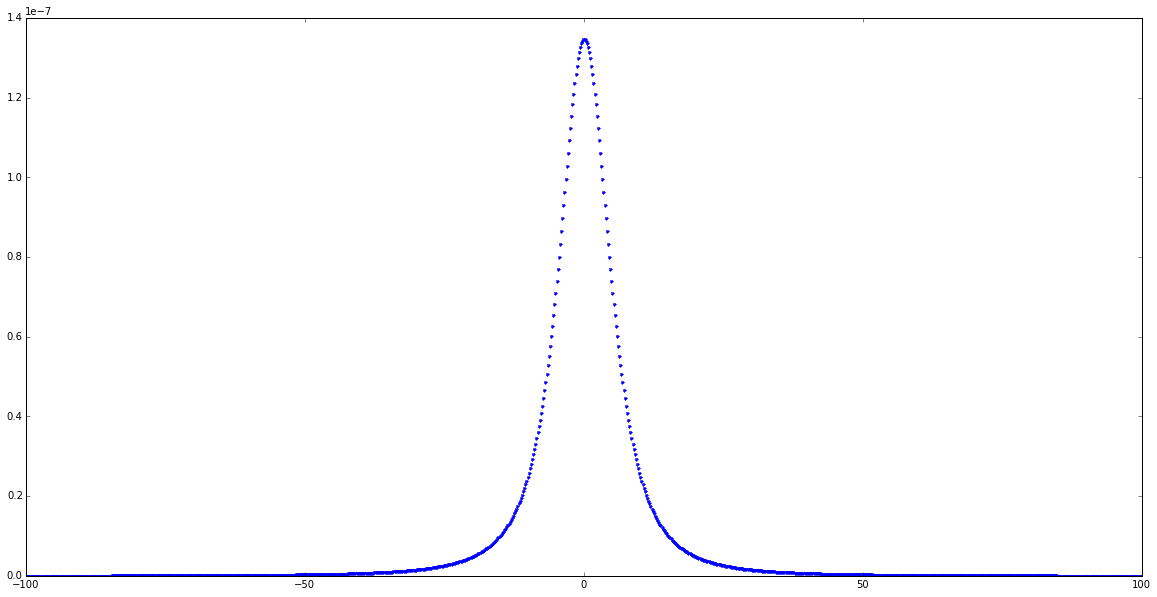

In [19]:
y = np.linspace(-100,100,1000)
b = calc_B_theo(y, 7)

plt.plot(y,b,'.')
plt.show()

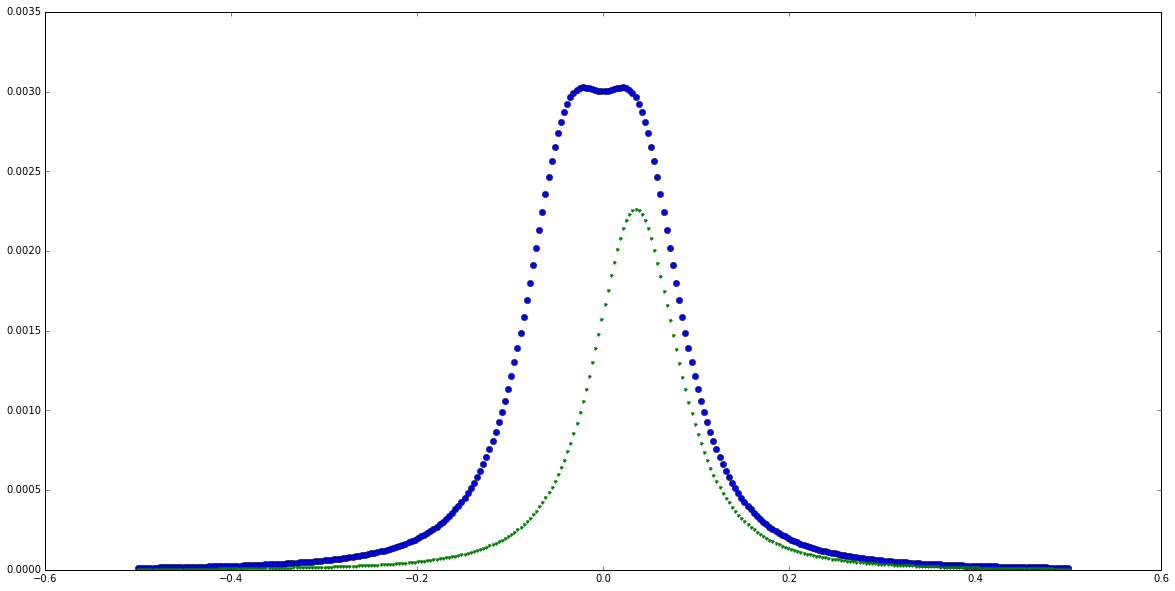

In [20]:
radiusSpread = np.linspace(.0673, .0737, 14)
#radiusSpread = np.linspace(.0705, .0737, 7)
RySpread = np.linspace(0, 0.01095, 12)

y = np.linspace(-.5, .5, 300)
b1 = [] # coil 1 field
b2 = [] # coil 2 field
bTot = np.zeros(np.shape(y))
RyMin = (0.067375/2)
for i in radiusSpread:
    for j in RySpread:
        b1 = calc_B_theo(y+(RyMin+j), i)
        b2 = calc_B_theo(y-(RyMin+j), i) #-1*RyMin - j)
        for k in range(len(y)):
            bTot[k] += (b1[k] + b2[k])

            
bSimple = calc_B_theo(y-.07/2, .07, N=168)

plt.plot(y,bTot,'o')
plt.plot(y,bSimple,'.')
plt.show() 

#print(bTot[(len(bTot))+10])